# Sandbox
Just a space to play with pythonic code and new functionality

## Strings

### f-strings
[Reference](https://docs.python.org/3/reference/lexical_analysis.html#f-strings) [PEP 0498](https://www.python.org/dev/peps/pep-0498/)

In [1]:
I = "Roberto"
year = 1961
message = f'{I} was born in {year}'
print(message)

Roberto was born in 1961


### String multiplication

In [2]:
print(f'{((I+"-") * 8)[:-1]} is too much {I}')

Roberto-Roberto-Roberto-Roberto-Roberto-Roberto-Roberto-Roberto is too much Roberto


## Pathlib
[Why you should be using pathlib](https://treyhunner.com/2018/12/why-you-should-be-using-pathlib/)

In [3]:
from pathlib import Path
root = Path('data')
print(root)

data


In [4]:
path = root / 'images'

In [5]:
print(path)

data/images


In [6]:
print(path.resolve())

/Users/stelling/htdocs/notebooks/data/images


## Type hinting
[Reference](https://docs.python.org/3/library/typing.html)

In [7]:
def find(string:str, sentence:str) -> bool:
    return string in sentence

statement = "I really like Isacc Asimov's books"

find("Asimov", statement)

True

In [8]:
find("Clarke", statement)

False

## Type annotations with typing

In [9]:
from typing import List, Optional, Dict, Iterable, Tuple

def total(xs:List[float]) -> float:
    return sum(xs)

values:List[int] = []
best_so_far:Optional[float] = None
    
counts:Dict[str, int] = {'data': 1, 'science': 2}

lazy = True
if lazy:
    evens:Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
    evens = [0, 2, 4, 6, 8]

triple:Tuple[int, float, int] = (10, 2.3, 5)

# Enumerations
An enumeration is a set of symbolic names (members) bound to unique, constant values. Within an enumeration, the members can be compared by identity, and the enumeration itself can be iterated over.


[Reference](https://docs.python.org/3/library/enum)

In [10]:
from enum import Enum, auto

class Monster(Enum):
    # By default auto() starts with 1
    # ZOMBIE = 0 forces a start with 0
    ZOMBIE = 0
    WARRIOR = auto()
    BEAR = auto()

In [11]:
for monster in Monster:
    print(monster)

Monster.ZOMBIE
Monster.WARRIOR
Monster.BEAR


In [12]:
print(Monster.ZOMBIE.__dict__)

{'_value_': 0, '_name_': 'ZOMBIE', '__objclass__': <enum 'Monster'>}


In [13]:
print(Monster.WARRIOR._value_)

1


# LRU cache decorator
[Reference](https://docs.python.org/3/library/functools.html#functools.lru_cache)

In [14]:
import time
def fib(number: int) -> int:
    if number == 0: return 0
    if number == 1: return 1
    
    return fib(number-1) + fib(number-2)
start = time.time()
print(fib(40))
print(f'Duration: {time.time() - start}s')

102334155
Duration: 42.28735589981079s


### With memoization
[Memoization - Wikipedia](https://en.wikipedia.org/wiki/Memoization)

In [15]:
from functools import lru_cache
@lru_cache(maxsize=512)
def fib_memoization(number: int) -> int:
    if number == 0: return 0
    if number == 1: return 1
    
    return fib_memoization(number-1) + fib_memoization(number-2)
start = time.time()
print(fib_memoization(40))
print(f'Duration: {time.time() - start}s')

102334155
Duration: 0.00020194053649902344s


# Extended iterable unpacking
[PEP 3132](https://www.python.org/dev/peps/pep-3132/)

In [16]:
head, *body, tail = range(5)
print(head, body, tail)
# 0 [1, 2, 3] 4
py, filename, *cmds = "python3.7 script.py -n 5 -l 15".split()
print(py)
print(filename)
print(cmds)
# python3.7
# script.py
# ['-n', '5', '-l', '15']
first, _, third, *_ = range(10)
print(first, third)

0 [1, 2, 3] 4
python3.7
script.py
['-n', '5', '-l', '15']
0 2


## Zip and 'Unzip'

In [17]:
actors = ["Peter Dincklage", "Lena Headey", "Emilia Clarke",
          "Kit Harrington", "Sophie Turner", "Maisie Williams",
          "Nicolaj Coster-Waldau", "Iain Glen", "John Bradley"]
roles = ["Tyrion Lanninster", "Cersei Lannister", "Daenerys Targaryen",
         "Jon Snow", "Sansa Stark", "Arya Stark",
         "Jaime Lannister", "Jorah Mormont", "Samwell Tarly",
         "Theon Greyjoy"]


print('Game of Thrones cast list\n')
for actor, role in zip(actors, roles):
    print(f'{actor} performed the role of {role}' )

cast = list(zip(actors, roles))

print(f'\nFirst tuple: {cast[0]}\n')

actors, roles = zip(*cast)

Game of Thrones cast list

Peter Dincklage performed the role of Tyrion Lanninster
Lena Headey performed the role of Cersei Lannister
Emilia Clarke performed the role of Daenerys Targaryen
Kit Harrington performed the role of Jon Snow
Sophie Turner performed the role of Sansa Stark
Maisie Williams performed the role of Arya Stark
Nicolaj Coster-Waldau performed the role of Jaime Lannister
Iain Glen performed the role of Jorah Mormont
John Bradley performed the role of Samwell Tarly

First tuple: ('Peter Dincklage', 'Tyrion Lanninster')



## Args and kwargs

In [18]:
def not_a_real_function(a, *args, **kwargs):
    """ Notice that there is nothing special in the names args and kwargs
    """
    print(f'a = {a}')
    print(f'Unnamed args = {args}')
    print(f'Keyword args = {kwargs}')
    
not_a_real_function(1, 2, 3, 4, five=5, six=6)

a = 1
Unnamed args = (2, 3, 4)
Keyword args = {'five': 5, 'six': 6}


# Data classes
[Reference](https://docs.python.org/3/library/dataclasses.html)
[PEP 0557](https://www.python.org/dev/peps/pep-0557/)

### Without data classes

In [19]:
class Armor:  
    def __init__(self, armor: float, description: str, level: int = 1):
        self.armor = armor
        self.level = level
        self.description = description
                 
    def power(self) -> float:
        return self.armor * self.level
    
armor = Armor(5.2, "Common armor.", 2)
print(armor.power())
# 10.4
print(armor)
# <__main__.Armor object at 0x7fc4800e2cf8>

10.4


### With data classes

In [20]:
from dataclasses import dataclass
@dataclass
class Armor:
    armor: float
    description: str
    level: int = 1
    
    def power(self) -> float:
        return self.armor * self.level
    
armor = Armor(5.2, "Common armor.", 2)
print(armor.power())
# 10.4
print(armor)
# Armor(armor=5.2, description='Common armor.', level=2)

10.4
Armor(armor=5.2, description='Common armor.', level=2)


# Breakpoint
[PEP 553](PEP 553 -- Built-in breakpoint() | Python.org)

In [21]:
name = "Roberto"
breakpoint()

--Call--
> /Users/stelling/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py(247)__call__()
-> def __call__(self, result=None):
(Pdb) continue


# Implicit namespace packages
[Packages](https://docs.python.org/3/tutorial/modules.html#packages)

# Attributes
[setattr](https://docs.python.org/3/library/functions.html#setattr) [getattr](https://docs.python.org/3/library/functions.html#getattr)

With `setattr` and `getattr` it is possible to create attributes for a given class and access these attributes using "_dot notation_".

In [22]:
class myData:
    pass

data = myData()
my_info = {'firstName': 'Roberto', 'surname': 'Stelling', 'dateOfBirth': '61/12/26', 'country': 'Brazil'}

for key, value in my_info.items():
    setattr(data, key, value)
    
setattr(data, 'processed', True)

for key in data.__dict__:
    print(f'{key}: {getattr(data, key)}')

print(data.firstName)

firstName: Roberto
surname: Stelling
dateOfBirth: 61/12/26
country: Brazil
processed: True
Roberto


## Parallelism with ipyparallel

In [23]:
import ipyparallel as ipp
from pathlib import Path
import numpy as np

In [24]:
rc = ipp.Client()
print(f'There are {len(rc)} clients: {rc.ids}')

There are 4 clients: [0, 1, 2, 3]


/Users/stelling/anaconda3/lib/python3.7/site-packages/ipyparallel/util.py:246: RuntimeWarning: IPython could not determine public IPs
  warnings.warn("IPython could not determine public IPs", RuntimeWarning)


In [25]:
np.arange(1, 5, 0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [26]:
# Quick'n'simple map with a Direct View
dv = rc[:]
results = dv.map_sync(lambda x:x**10, np.arange(1, 5, 0.25))
print(results)

[1.0, 9.313225746154785, 57.6650390625, 269.38938999176025, 1024.0, 3325.256730079651, 9536.7431640625, 24735.855675697327, 59049.0, 131472.10297489166, 275854.7353515625, 549936.6670846939, 1048576.0, 1922601.6048898697, 3405062.8916015625, 5847040.422249794]


### Pi digits
Adapted from ipyparallel example

In [27]:
import sympy
from pathlib import Path
import collections

In [28]:
pi = sympy.pi.evalf(10000)

In [29]:
digits = sorted([d for d in str(pi)[2:]])
freqs = np.array(list(collections.Counter(digits).values()))
freqs

array([ 968, 1026, 1021,  974, 1012, 1046, 1021,  969,  948, 1014])

In [30]:
pathpi = Path(".")
pathpi = pathpi / "ipyparallel" / "pidigits.py"
with open(pathpi) as pidigits:
    code = compile(pidigits.read(), "pidigits.py", 'exec')
    exec(code)

In [31]:
freqs = one_digit_freqs(digits)
freqs

array([ 968, 1026, 1021,  974, 1012, 1046, 1021,  969,  948, 1014],
      dtype=int32)

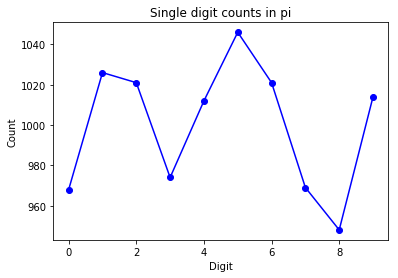

In [32]:
plot_one_digit_freqs(freqs)